Epoch 1/500
20/20 [==============================] - 0s 1ms/step - loss: 1.6637 - accuracy: 0.4560
Epoch 2/500
20/20 [==============================] - 0s 1ms/step - loss: 0.6773 - accuracy: 0.6700
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.9130
Epoch 4/500
20/20 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.9110
Epoch 5/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.9230
Epoch 6/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.9520
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9530
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 0.2062 - accuracy: 0.9550
Epoch 9/500
20/20 [==============================] - 0s 997us/step - loss: 0.1817 - accuracy: 0.9680
Epoch 10/500
20/20 [==============================] - 0s 965us/step - loss: 0.1678 - accuracy: 0.9690
Epoch

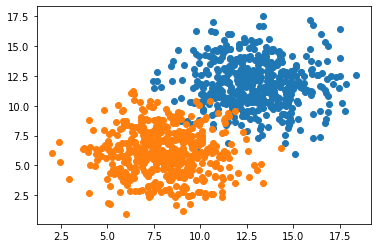

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y=y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')



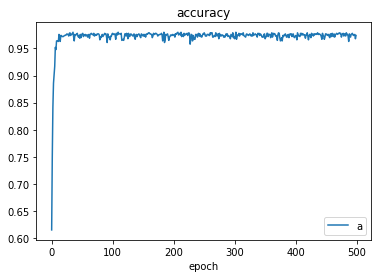

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend('accuracy')

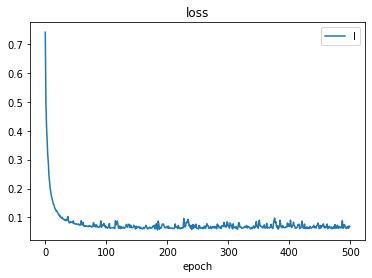

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend('loss')

In [ ]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  predict_function = model.predict(grid)
  z = predict_function.reshape(xx.shape)
  plt.contourf(xx, yy, z)

Prediction is: [[0.99998665]]


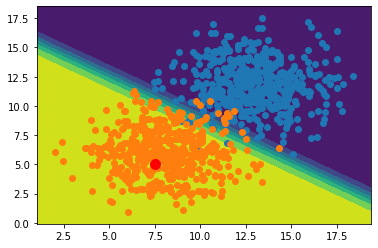

In [ ]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = "o", markersize = 10, color = "red")
print("Prediction is:", prediction)